In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Clustering - recomendando musicas\Dados\Dados_totais.csv')
dados_generos = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Clustering - recomendando musicas\Dados\data_by_genres.csv')
dados_anos = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Clustering - recomendando musicas\Dados\data_by_year.csv')

In [2]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [3]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [4]:
dados.shape

(20311, 19)

In [5]:
dados = dados.drop(['explicit', 'key', 'mode'], axis=1)
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [6]:
dados.shape

(20311, 16)

In [7]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [8]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [9]:
dados_generos.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [10]:
dados_generos = dados_generos.drop(['key', 'mode'], axis=1)
dados_generos.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [11]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [12]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
dados_anos.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [14]:
dados_anos = dados_anos.drop(['mode', 'key'], axis=1)
dados_anos.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845
2,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189
3,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017
4,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317


In [15]:
dados_anos = dados_anos[dados_anos['year'] >=2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [16]:
dados_anos = dados_anos.reset_index()

In [17]:
dados_anos.head()

,index,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
1,80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
2,81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
3,82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
4,83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10688\286184314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), annot=True, fmt='.1f')


<AxesSubplot: >

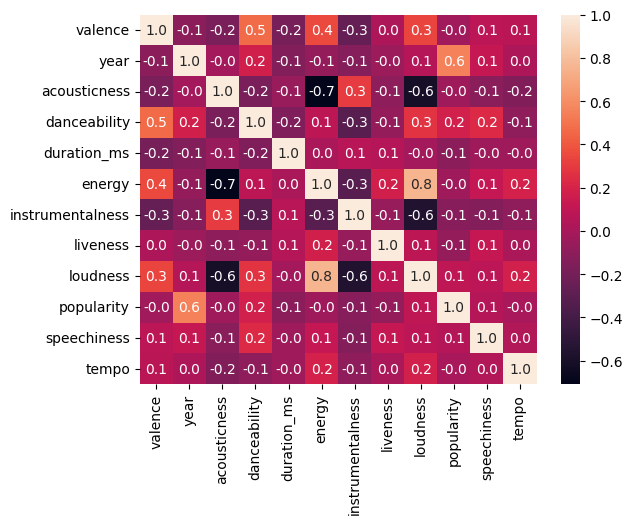

In [18]:
import seaborn as sns
sns.heatmap(dados.corr(), annot=True, fmt='.1f')

# Clusterização por gênero

In [19]:
dados_generos.shape

(2973, 12)

In [20]:
dados_generos['genres'].value_counts().sum()

2973

In [21]:
dados_generos_1 = dados_generos.drop('genres', axis=1)
dados_generos_1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(SEED)


# aqui estamos criando um pipeline usando dois métodos já dentro dele
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [23]:
genre_pca = pca_pipeline.fit_transform(dados_generos_1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_pca)
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


In [24]:
from sklearn.cluster import KMeans
import numpy as np

SEED = 1224
np.random.seed(SEED)

# verbose mostra como está sendo realizado o modelo
kmeans_pca = KMeans(n_clusters=5, verbose=True)

kmeans_pca.fit(projection)
kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4523.5678155437.
Iteration 1, inertia 3668.985552156031.
Iteration 2, inertia 3624.7309257118272.
Iteration 3, inertia 3602.4958137588214.
Iteration 4, inertia 3588.0607912404967.
Iteration 5, inertia 3575.439570259311.
Iteration 6, inertia 3566.3761311630265.
Iteration 7, inertia 3562.5917284574994.
Iteration 8, inertia 3560.3144677009395.
Iteration 9, inertia 3558.8854951526546.
Iteration 10, inertia 3558.002748934059.
Iteration 11, inertia 3557.7295547755007.
Converged at iteration 11: center shift 9.319981044865273e-05 within tolerance 0.0002709886847099652.
Initialization complete
Iteration 0, inertia 3650.516684764657.
Iteration 1, inertia 3552.891536564822.
Iteration 2, inertia 3528.9425421232304.
Iteration 3, inertia 3518.8491320487183.
Iteration 4, inertia 3512.6717916139814.
Iteration 5, inertia 3509.174107824752.
Iteration 6, inertia 3506.388333551383.
Iteration 7, inertia 3505.0910743094146.
Iteration 8, inertia 3504.646511738502

array([3, 3, 4, ..., 4, 1, 4])

In [25]:
dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

In [26]:
projection

,x,y,cluster_pca
0,5.910268,-0.011146,3
1,2.787093,4.498483,3
2,-0.757538,-1.258495,4
3,1.020521,-0.931690,1
4,0.753911,-0.999861,1
...,...,...,...
2968,-0.475136,-0.017126,2
2969,-3.026756,-1.304983,4
2970,-0.832511,-1.089726,4
2971,1.774790,-3.695233,1


In [27]:
projection['generos'] = dados_generos['genres']
projection

,x,y,cluster_pca,generos
0,5.910268,-0.011146,3,21st century classical
1,2.787093,4.498483,3,432hz
2,-0.757538,-1.258495,4,8-bit
3,1.020521,-0.931690,1,[]
4,0.753911,-0.999861,1,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,2,zolo
2969,-3.026756,-1.304983,4,zouglou
2970,-0.832511,-1.089726,4,zouk
2971,1.774790,-3.695233,1,zurich indie


In [28]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266393

In [29]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [30]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [31]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

dados_2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados_2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dados_musicas_dummies = dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis=1)

In [34]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])

dados_musicas_pca = pca_pipeline.fit_transform(dados_musicas_dummies)
projection_musicas = pd.DataFrame(data=dados_musicas_pca)
projection_musicas

,0,1,2,3,4,5,6,7,8,9,...,602,603,604,605,606,607,608,609,610,611
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,0.002516,0.002097,-0.019072,-0.009111,0.005154,-0.034027,-0.032617,-1.075891e-12,-7.010474e-13,1.113623e-14
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,0.036047,-0.026825,-0.031678,-0.031986,0.029708,-0.016322,-0.030234,4.595801e-13,-5.126646e-13,-1.510314e-12
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,-0.013908,0.007214,0.003084,0.017097,0.017361,-0.010979,-0.012781,-6.795497e-13,2.021410e-12,1.280667e-13
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.038784,0.020814,-0.046126,0.089337,0.164777,-0.064148,-0.040911,-1.050252e-11,1.308299e-11,1.854043e-12
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,0.006291,0.003111,-0.009148,-0.011937,-0.004081,-0.017478,-0.010033,1.921135e-13,2.800132e-13,-3.373328e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.155320,0.335148,0.103481,-0.235355,-0.054256,0.016922,-0.125947,1.042548e-12,3.512271e-11,-3.777425e-12
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,0.264741,0.210461,-0.094337,-0.183026,0.074605,0.005622,0.000054,-6.596588e-12,-2.118323e-11,-1.877224e-12
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,0.263781,-0.189241,0.213993,-0.033420,-0.157564,0.213849,-0.065180,8.634915e-12,-8.602160e-12,-5.919483e-12
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,0.398941,0.560966,-0.437674,-0.784640,0.080684,0.038379,0.108493,-6.201412e-12,-2.869120e-11,1.327322e-11


In [35]:
kmeans_pca_musicas = KMeans(n_clusters=50, verbose=False)

kmeans_pca_musicas.fit(projection_musicas)

dados['cluster_pca'] = kmeans_pca_musicas.predict(projection_musicas)
projection_musicas['cluster_pca'] = kmeans_pca_musicas.predict(projection_musicas)

In [36]:
projection_musicas['artist'] = dados['artists']
projection_musicas['song'] = dados['artists_song']

In [37]:
projection_musicas

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-1.075891e-12,-7.010474e-13,1.113623e-14,44,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,4.595801e-13,-5.126646e-13,-1.510314e-12,20,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-6.795497e-13,2.021410e-12,1.280667e-13,20,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,-1.050252e-11,1.308299e-11,1.854043e-12,20,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,1.921135e-13,2.800132e-13,-3.373328e-13,7,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,1.042548e-12,3.512271e-11,-3.777425e-12,28,Bazzi,Bazzi - I Don't Think I'm Okay
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,-6.596588e-12,-2.118323e-11,-1.877224e-12,28,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,8.634915e-12,-8.602160e-12,-5.919483e-12,28,Fleet Foxes,Fleet Foxes - Sunblind
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,-6.201412e-12,-2.869120e-11,1.327322e-11,28,Gunna,Gunna - NASTY GIRL / ON CAMERA


In [38]:
nome_musica = 'Ed Sheeran - Shape of You'

In [39]:
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_musicas[projection_musicas['song'] == nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_musicas[projection_musicas['cluster_pca'] == cluster][[0, 1, 'song']]
x_musica = list(projection_musicas[projection_musicas['song'] == nome_musica][0])[0]
y_musica = list(projection_musicas[projection_musicas['song'] == nome_musica][1])[0]

distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])

musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias

recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

,0,1,song,id,distancias
2463,-0.826954,-2.939691,Ed Sheeran - Shape of You,7qiZfU4dY1lWllzX7mPBI3,0.000000
13421,-0.826575,-2.915302,$uicideBoy$ - For the Last Time,240audWazVjwvwh7XwfSZE,0.024393
2942,-0.863727,-2.965997,Marshmello - Be Kind (with Halsey),3Z8FwOEN59mRMxDCtb8N0A,0.045213
17093,-0.792448,-2.974369,Joyner Lucas - Will - Remix,6WI33r2QRxyxttn3KH0XkC,0.048920
5371,-0.874338,-2.927113,The Kid LAROI - WRONG (feat. Lil Mosey),1EWkw4Fa6IlnsAihLUlFFM,0.049025
15392,-0.792012,-2.987829,$uicideBoy$ - Putrid Pride,4CwA4CdTQqNv18QSAW3Srk,0.059483
15388,-0.784530,-2.897926,Pop Smoke - Paranoia (feat. Gunna & Young Thug),3QqJ44HiM84iyZS0G2IKIP,0.059533
5271,-0.789801,-2.986457,Ed Sheeran - South of the Border (feat. Camila...,4vUmTMuQqjdnvlZmAH61Qk,0.059728
18479,-0.904140,-2.933036,21 Savage - 1.5,2wOXxtHZgRkkrkEbKLzzqs,0.077472
17156,-0.846706,-2.863550,KYLE - What It Is (feat. Chris Brown),26rIWI1QTPClaOOI4Kbxhe,0.078662


In [40]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [41]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(scope=scope, redirect_uri='http://localhost:5000/callback', client_id='31ea29b345b84c499f4048cd48185288', client_secret='08f5f2da02db44298e31796c23932c28')

In [42]:
client_credentials_manager = SpotifyClientCredentials(client_id='31ea29b345b84c499f4048cd48185288', client_secret='08f5f2da02db44298e31796c23932c28')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

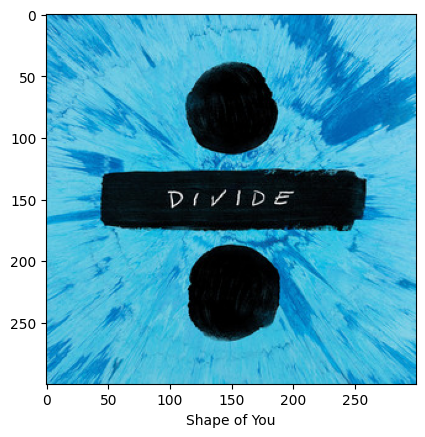

In [43]:
import matplotlib.pyplot as plt
from skimage import io

id = dados[dados['artists_song'] == nome_musica]['id'].iloc[0]
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

In [44]:
def recommend_id(playlist_id):
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track['album']['images'][1]['url'])
        name.append(track['name'])
    return name, url

In [45]:
name, url = recommend_id(recomendada['id'])

In [46]:
url

['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
 'https://i.scdn.co/image/ab67616d00001e02f795a2962820664b4112901e',
 'https://i.scdn.co/image/ab67616d00001e02fdf2e993e10e67396b3bf759',
 'https://i.scdn.co/image/ab67616d00001e024ac196312c24faedb76a345e',
 'https://i.scdn.co/image/ab67616d00001e02891f0552bed344dc2bfe322f',
 'https://i.scdn.co/image/ab67616d00001e0207aa1426cb2b3cfd8ad67c64',
 'https://i.scdn.co/image/ab67616d00001e0246e1307c35579c3483ea7b03',
 'https://i.scdn.co/image/ab67616d00001e0273304ce0653c7758dd94b259',
 'https://i.scdn.co/image/ab67616d00001e02280689ecc5e4b2038bb5e4bd',
 'https://i.scdn.co/image/ab67616d00001e02b46b5fb6fdc6f5c720fcb183']

In [79]:
import os

def visualize_songs(name, url):
    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in  enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color='w', fontsize=0.1)
        plt.yticks(color='w', fontsize=0.1)
        plt.xlabel(name[i], fontsize=8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom=False)
        plt.grid(visible=None)
    plt.show()


PermissionError: [WinError 32] O arquivo já está sendo usado por outro processo: 'C:\\Users\\Gabriel\\AppData\\Local\\Temp\\tmpda539rcx'

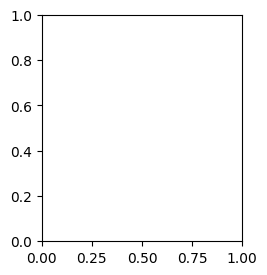

In [80]:
visualize_songs(name, url)